In [1]:
import fnmatch
import os
import numpy
import pandas
import seaborn

In [2]:
# generate an empty dataframe
df = pandas.DataFrame(columns = ["business_id", "url", "name", "open_precovid", "open_postcovid", "address", "city", "state", "postal_code"])

In [3]:
# loop over all files in the directory and concatenate the scrape output files
for file in os.listdir("data"):
    if fnmatch.fnmatch(file, "output*to*.csv"):
        df = pandas.concat([df, pandas.read_csv("data/" + file, index_col = "Unnamed: 0")])

In [4]:
df.head()

,business_id,url,name,open_precovid,open_postcovid,address,city,state,postal_code
0,CUUYW_p6UjItCOVR_Q0oQg,https://www.yelp.com/biz/Pure-Scottsdale,100% Pure,1,-1,"7014 E Camelback Rd, Spc 2072",Scottsdale,AZ,85251
1,u2iiLNWXPDRa2atKiDWzpQ,https://www.yelp.com/biz/Sacred-Grounds-Jazz-C...,Sacred Grounds Jazz Coffeehouse,1,1,4425 N Granite Reef Rd,Scottsdale,AZ,85251
2,eGEJomznMqJYqGun2ZXRpg,https://www.yelp.com/biz/Salon-Tour-De-Force-S...,Salon Tour De Force,1,1,7134 E 5th Ave,Scottsdale,AZ,85251
3,79V8osIXJft6FIixcnFRww,https://www.yelp.com/biz/El-Dorado-Apartments-...,El Dorado Apartments - CAM Properties,0,-1,6825 E 4th St,Scottsdale,AZ,85251
4,w4LTZaO7mNbjkNxqJmmH3Q,https://www.yelp.com/biz/Circle-K-Scottsdale,Circle K,1,1,3410 N Hayden Rd,Scottsdale,AZ,85251


In [5]:
df.shape

(17000, 9)

In [6]:
errors = df[df["open_postcovid"] == -1]
df = df[df["open_postcovid"] != -1]

In [7]:
print("okay: " + str(df.shape[0]))
print("errors: " + str(errors.shape[0]))
print("error %: " + str(int(errors.shape[0] / (df.shape[0] + errors.shape[0]) * 100)) + "%")

okay: 15088
errors: 1912
error %: 11%


In [8]:
ct = pandas.crosstab(df["open_precovid"], df["open_postcovid"])
print("was open and stayed open: " + str(ct.loc[1][1]) + " (" + str(int(round(ct.loc[1][1] / df.shape[0] * 100))) + "%)")
print("was open and then closed: " + str(ct.loc[1][0]) + " (" + str(round(ct.loc[1][0] / df.shape[0] * 100, 1)) + "%)")
print("was closed and stayed closed: " + str(ct.loc[0][0]) + " (" + str(round(ct.loc[0][0] / df.shape[0] * 100, 1)) + "%)")
print("was closed and then opened: " + str(ct.loc[0][1]) + " (" + str(int(round(ct.loc[0][1] / df.shape[0] * 100))) + "%)")

was open and stayed open: 11836 (78%)
was open and then closed: 40 (0.3%)
was closed and stayed closed: 75 (0.5%)
was closed and then opened: 3137 (21%)


In [9]:
errors[["url", "name"]]

,url,name
0,https://www.yelp.com/biz/Pure-Scottsdale,100% Pure
3,https://www.yelp.com/biz/El-Dorado-Apartments-...,El Dorado Apartments - CAM Properties
5,https://www.yelp.com/biz/Sugar-Me-Wax--Scottsd...,Sugar Me Wax - Scottsdale
8,https://www.yelp.com/biz/Cin--Cin-Restaurant-S...,Cin-Cin Restaurant
15,https://www.yelp.com/biz/Sunsational-Swim-Scho...,Sunsational Swim School - Private Swim Lessons
...,...,...
104,https://www.yelp.com/biz/Roxanne-S-Couture-Sco...,Roxanne's Couture
118,https://www.yelp.com/biz/Mega1043-Scottsdale,Mega 104.3
130,https://www.yelp.com/biz/Russ-Lyon-Sotheby-S-I...,Russ Lyon Sotheby's International Realty
131,https://www.yelp.com/biz/Scottsdale-Children-S...,Scottsdale Children's Group


In [10]:
df.groupby(["state", "postal_code"]).count()

business_id   url  name  open_precovid  open_postcovid  \
state postal_code                                                           
AZ    85004                274   274   274            274             274   
      85202                660   660   660            660             660   
      85206                268   268   268            268             268   
      85224                786   786   786            786             786   
      85226                567   567   567            567             567   
      85233                681   681   681            681             681   
      85234                689   689   689            689             689   
      85251               1892  1892  1892           1892            1892   
      85258                679   679   679            679             679   
      85260               1737  1737  1737           1737            1737   
      85283                624   624   624            624             624   
      85301                561   561   561            561             561   
NC    28202                631   631   631            631             631   
NV    89052               1296  1296  1296           1296            1296   
      89101               1266  1266  1266           1266            1266   
      89102                688   688   688            688             688   
      89117                489   489   489            489             489   
      89123               1299  1299  1299           1299            1299   
SC    28202                  1     1     1              1               1   

                   address  city  
state postal_code                 
AZ    85004            265   274  
      85202            633   660  
      85206            255   268  
      85224            723   786  
      85226            547   567  
      85233            631   681  
      85234            625   689  
      85251           1796  1892  
      85258            648   679  
      85260           1667  1737  
      85283            592   624  
      85301            527   561  
NC    28202            600   631  
NV    89052           1249  1296  
      89101           1094  1266  
      89102            671   688  
      89117            467   489  
      89123           1216  1299  
SC    28202              1     1

In [11]:
len(df["postal_code"].unique())

18

In [48]:
# removes zips with insufficient number of businesses
df = df[df["postal_code"] != 28202]

In [49]:
df_agg = df[["postal_code"]].groupby("postal_code").count()

In [50]:
df_agg["n_businesses"] = df.groupby("postal_code")["business_id"].count()
df_agg["open_precovid"] = df.groupby("postal_code")["open_precovid"].sum()
df_agg["open_postcovid"] = df.groupby("postal_code")["open_postcovid"].sum()

In [51]:
df_agg["perc_open_precovid"] = df_agg["open_precovid"] / df_agg["n_businesses"]
df_agg["perc_open_postcovid"] = df_agg["open_postcovid"] / df_agg["n_businesses"]

In [52]:
df_agg["perc_open_abschange"] = df_agg["perc_open_postcovid"] - df_agg["perc_open_precovid"]
df_agg["perc_open_relchaneg"] = (df_agg["perc_open_postcovid"] - df_agg["perc_open_precovid"]) / df_agg["perc_open_precovid"]

In [53]:
df["stayed_open"] = numpy.where((df["open_precovid"] == 1) & (df["open_postcovid"] == 1), True, False)
df["became_open"] = numpy.where((df["open_precovid"] == 0) & (df["open_postcovid"] == 1), True, False)

In [54]:
df_agg["stayed_open"] = df.groupby("postal_code")["stayed_open"].sum()
df_agg["perc_stayed_open"] = df_agg["stayed_open"] / df_agg["open_precovid"]

df_agg["became_open"] = df.groupby("postal_code")["became_open"].sum()
df_agg["perc_became_opened"] = df_agg["became_open"] / (df_agg["n_businesses"] - df_agg["open_precovid"])

In [55]:
df_agg

,n_businesses,open_precovid,open_postcovid,perc_open_precovid,perc_open_postcovid,perc_open_abschange,perc_open_relchaneg,stayed_open,perc_stayed_open,became_open,perc_became_opened
postal_code,,,,,,,,,,,
85004,274,180,274,0.656934,1.000000,0.343066,0.522222,180.0,1.000000,94.0,1.000000
85202,660,497,656,0.753030,0.993939,0.240909,0.319920,496.0,0.997988,160.0,0.981595
85206,268,223,264,0.832090,0.985075,0.152985,0.183857,221.0,0.991031,43.0,0.955556
85224,786,611,779,0.777354,0.991094,0.213740,0.274959,605.0,0.990180,174.0,0.994286
85226,567,443,565,0.781305,0.996473,0.215168,0.275395,442.0,0.997743,123.0,0.991935
85233,681,562,676,0.825257,0.992658,0.167401,0.202847,560.0,0.996441,116.0,0.974790
85234,689,595,682,0.863570,0.989840,0.126270,0.146218,594.0,0.998319,88.0,0.936170
85251,1892,1409,1878,0.744715,0.992600,0.247886,0.332860,1403.0,0.995742,475.0,0.983437
85258,679,576,674,0.848306,0.992636,0.144330,0.170139,575.0,0.998264,99.0,0.961165


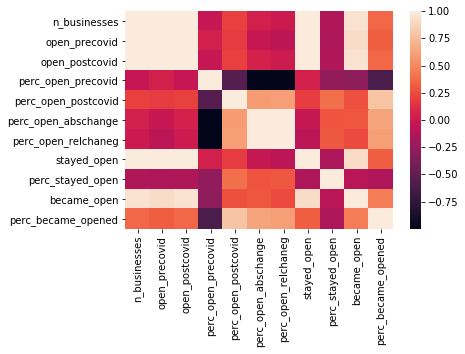

In [56]:
seaborn.heatmap(df_agg.corr())